# EDA and ETL for scraped data from IPM and AskExtension data knowledge

In [1]:
'''
['exoticPests.json',
 'fruitItems_new.json',
 'fruitVeggieEnvironItems_new.json',
 'ipmdata_new.json',
 'pestDiseaseItems_new.json',
 'plantFlowerItems.json',
 'turfPests.json',
 'veggieItems_new.json',
 'weedItems.json']
'''
_PATH = '../data/uc-ipm/updated/'
DATA_FILE_NAMES = sorted(os.listdir(_PATH))

In [2]:
import pandas as pd

import json
import os

import matplotlib.pyplot as plt

COLOR = 'white'
plt.rcParams['text.color']      = COLOR
plt.rcParams['text.color']      = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color']     = COLOR
plt.rcParams['ytick.color']     = COLOR

## IPM Data

In [3]:
FILE_NAME = 'ipmdata_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 214 non-null    object
 1   urlPestNote          214 non-null    object
 2   descriptionPestNote  214 non-null    object
 3   life_cycle           214 non-null    object
 4   damagePestNote       214 non-null    object
 5   managementPestNote   214 non-null    object
 6   imagePestNote        214 non-null    object
 7   tablePestNote        214 non-null    object
 8   urlQuickTip          214 non-null    object
 9   contentQuickTips     214 non-null    object
 10  imageQuickTips       214 non-null    object
 11  video                214 non-null    object
dtypes: object(12)
memory usage: 20.2+ KB


In [4]:
df.sample(5)

,name,urlPestNote,descriptionPestNote,life_cycle,damagePestNote,managementPestNote,imagePestNote,tablePestNote,urlQuickTip,contentQuickTips,imageQuickTips,video
123,Red Imported Fire Ant,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7487.html...,The red imported fire ant (Solenopsis invicta)...,Red imported fire ant workers are variable in ...,The red imported fire ant's sting is a serious...,"Because fire ants can sting en masse, most peo...",[{'caption': 'Red imported fire ant queen surr...,"[<table class=""indextable"" id=""TABLE1"">\n<capt...",,,[],[]
14,Asian Citrus Psyllid and Huanglongbing Disease,http://ipm.ucanr.edu/PMG/PESTNOTES/pn74155.htm...,"The Asian citrus psyllid, Diaphorina citri, is...",Psyllid Life Stages The adult Asian citrus psy...,The Asian citrus psyllid damages citrus when i...,In response to the establishment of ACP in Cal...,[{'caption': 'Asian citrus psyllid adult and n...,[],,,[],[]
204,Biological Control,,,,,,[],[],,,[],[{'videoLink': 'http://stream.ucanr.org/biocon...
37,Deer,http://ipm.ucanr.edu/PMG/PESTNOTES/pn74117.htm...,Deer are one of the California’s most visible ...,,Deer usually feed in the late evening and very...,Habitat Modification—Creating Deer-Resistant L...,[{'caption': 'Adult female black-tailed deer a...,[],http://ipm.ucanr.edu/QT/deercard.html?src=exchbt,"Although pleasant to look at in the wild, deer...",[{'link': 'http://ipm.ucanr.edu/PMG/PESTNOTES/...,[]
148,Fleas,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7419.html...,"Cat fleas, Ctenocephalides felis, are the most...","Unlike most fleas, adult cat fleas remain on t...",,"New, safer, and more effective products aimed ...","[{'caption': 'Figure 1. Adult cat flea.', 'lin...",[],http://ipm.ucanr.edu/QT/fleascard.html?src=exchbt,"Fleas are annoying to people and pets, especia...",[{'link': 'http://ipm.ucanr.edu/PMG/PESTNOTES/...,[]


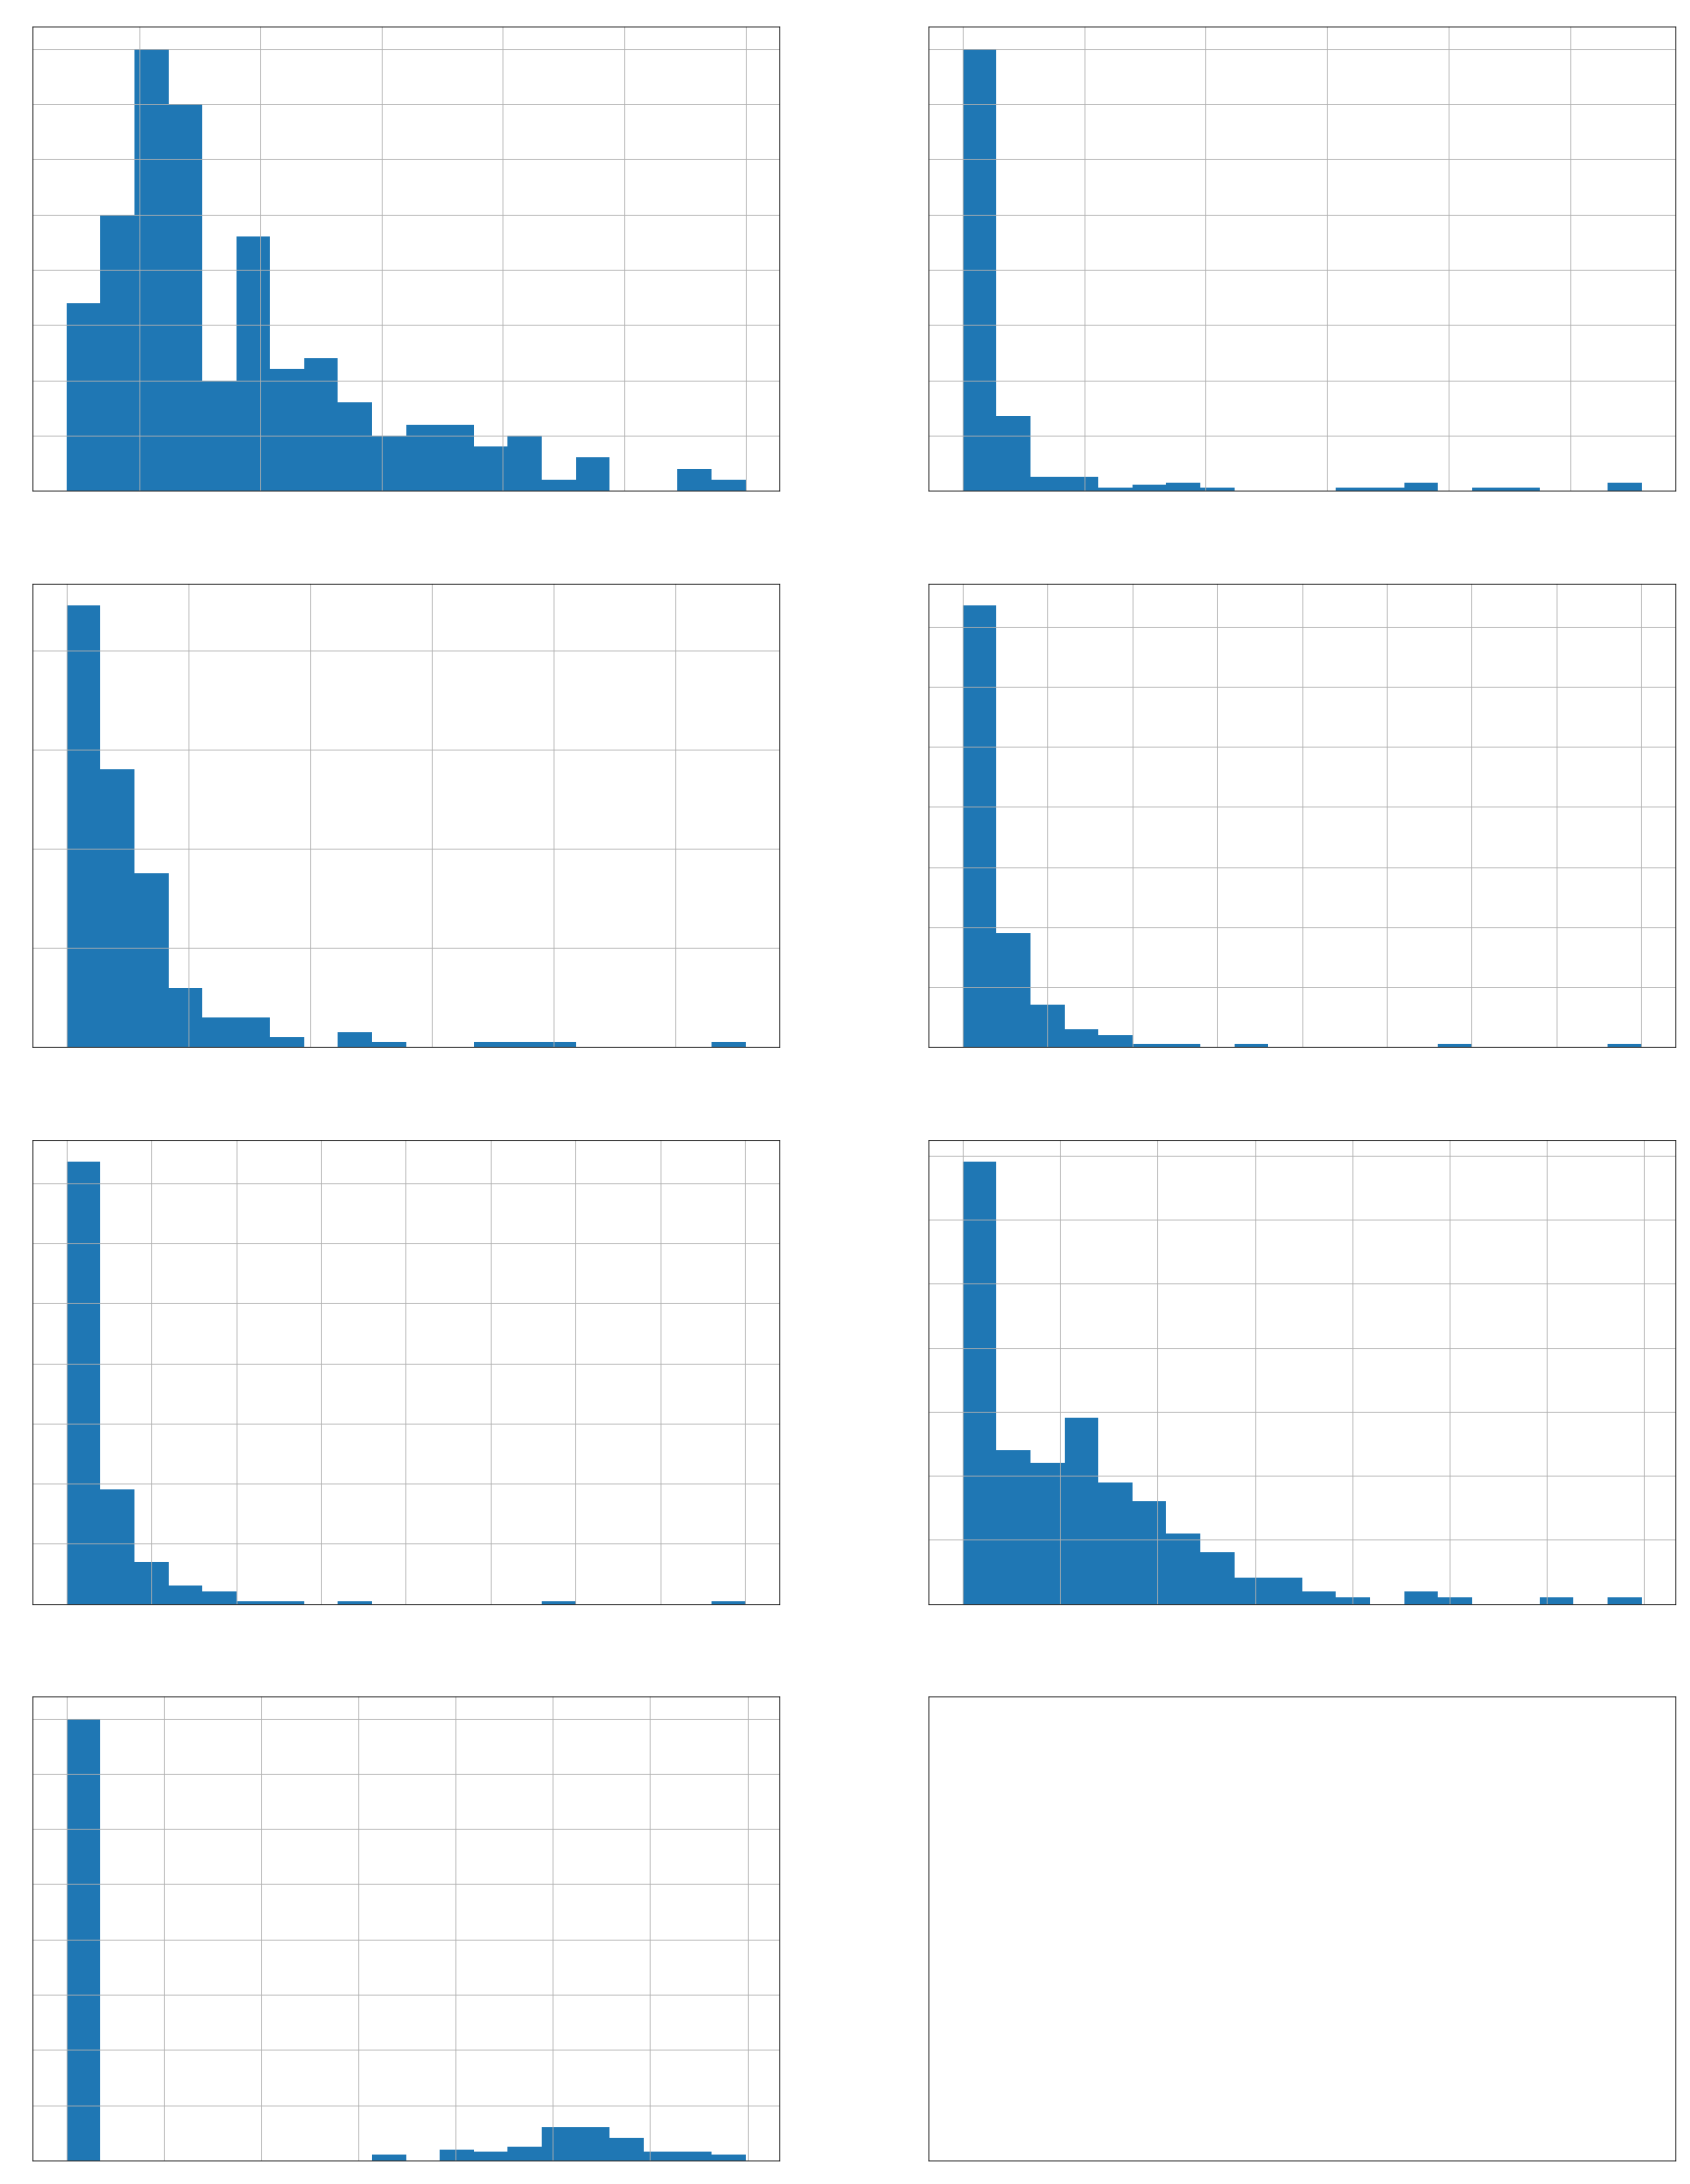

In [5]:
text_columns = ['name', 'descriptionPestNote', 'life_cycle', 'damagePestNote', 'damagePestNote', 'managementPestNote', 'contentQuickTips']
fig, axes = plt.subplots(4, 2, figsize = (30, 40))
for i, col in enumerate(text_columns):
    r = i//2
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Description of columns

Columns:
- `name`
    - Name of the pest
    - create __embedding__
- `damagePestNote`
    - Description of the damage caused by this pest
    - __inject__ into ES, create __embedding__
    - can be used to match by __DAMAGE__
- `imagePestNote`
    - Some images regarding the pest
    - create __embedding__ for captions
- `imageQuickTips`
    - Some addiotinal links to images related to pests (similar to `imagePestNote`)
    - create __embedding__ for captions
- `video`
    - Links to video related to pests
    - create __embedding__ for captions

## Fruit items

In [6]:
FILE_NAME = 'fruitItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 15 non-null     object
 1   url                  15 non-null     object
 2   cultural_tips        14 non-null     object
 3   pests_and_disorders  15 non-null     object
dtypes: object(4)
memory usage: 608.0+ bytes


In [7]:
df.sample(5)

,name,url,cultural_tips,pests_and_disorders
11,Avocados,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/avocados...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Amorbia', 'link': 'http://ipm.uc..."
7,Pears,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/pears.ht...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
4,Strawberries,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/strawber...,"[{'tip': 'Bed preparation', 'link': 'http://ip...","[{'problem': 'Spotted wing drosophila', 'link'..."
3,Figs,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/figs.htm...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Ants', 'link': 'http://ipm.ucanr..."
6,Blackberries and Raspberries,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/blackber...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Spotted wing drosophila', 'link'..."


In [8]:
print('CULTURAL_TIPS field')
print(json.dumps(df['cultural_tips'][0], indent=4, sort_keys=True))

print('PESTS_AND_DISORDERS field')
print(json.dumps(df['pests_and_disorders'][0], indent=4, sort_keys=True))


CULTURAL_TIPS field
[
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/depbrkcanfert.html?src=exchbt",
        "tip": "Fertilizing"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondfirst.html?src=exchbt",
        "tip": "First-year pruning"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/walnutharvet.html?src=exchbt",
        "tip": "Harvesting and storage"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/walnutplanting.html?src=exchbt",
        "tip": "Planting"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/walnutpruning.html?src=exchbt",
        "tip": "Pruning"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/sanitation.html?src=exchbt",
        "tip": "Sanitation"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondsite.html?src=exchbt",
        "tip": "Site selection"
    },
    {
   

### FOR TIME BEING NOT PROCESSED INTO ES

### TODO
- Create se
- Create separate field with __tips__ keywords
- Create separate field with __problems__ keywords

## Veggie Items

In [9]:
FILE_NAME = 'veggieItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 31 non-null     object
 1   url                  31 non-null     object
 2   description          31 non-null     object
 3   tips                 31 non-null     object
 4   images               31 non-null     object
 5   pests_and_disorders  31 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB


In [10]:
df.sample(5)

,name,url,description,tips,images,pests_and_disorders
1,Artichoke,http://ipm.ucanr.edu/home-and-landscape/artich...,Artichokes are grown both as annual and perenn...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-AR-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
25,Chard,http://ipm.ucanr.edu/home-and-landscape/chard/...,"Chard, also called Swiss chard, are beets grow...",Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
30,Cauliflower,http://ipm.ucanr.edu/home-and-landscape/caulif...,Cauliflower is a cool-season vegetable that ca...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/U/D-CC-UNK...,"[{'problem': 'Beet armyworm', 'link': 'http://..."
21,Tomato,http://ipm.ucanr.edu/home-and-landscape/tomato...,Tomatoes are a popular garden vegetable with m...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-TO-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
8,Asparagus,http://ipm.ucanr.edu/home-and-landscape/aspara...,Asparagus is a perennial vegetable with edible...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Asparagus beetles', 'link': 'htt..."


### FOR TIME BEING DO NOT PROCESS

### TODO
- Create separate field with __tips__ keyword
- Create separate field with __images_caption__
- Create separate field with __problems__

## Environment Fruit and Veggie

In [11]:
FILE_NAME = 'fruitVeggieEnvironItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  223 non-null    object
 1   url                   223 non-null    object
 2   description           223 non-null    object
 3   identification        223 non-null    object
 4   damage                223 non-null    object
 5   disorder_development  223 non-null    object
 6   solutions             223 non-null    object
 7   images                223 non-null    object
dtypes: object(8)
memory usage: 14.1+ KB


In [12]:
df.sample(5)

,name,url,description,identification,damage,disorder_development,solutions,images
76,Frost,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/...,Frost-damaged leaves or twigs become water-soa...,,,,"Certain cultural practices, such as avoiding p...",[{'link': 'http://ipm.ucanr.edu/PMG/W/A-CI-WEA...
97,Aeration deficit,http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/aerati...,Aeration is the process of air passage though ...,A short-term (acute) aeration deficit (for hou...,,Aeration deficit is especially common in irrig...,"To determine the cause of aeration deficit, as...",[{'link': 'http://ipm.ucanr.edu/PMG/P/A-AV-PHY...
110,Soil properties and water availability to roots,http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/soil.h...,A prolonged deficiency or excess of soil moist...,,,,Learn the characteristics of your soil to help...,[{'link': 'http://ipm.ucanr.edu/PMG/W/A-WO-WSN...
180,Sunscald on beans,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/ENVIRON/...,Sunscald symptoms first appear as small water-...,,,,This condition is caused by exposure to intens...,[{'link': 'http://ipm.ucanr.edu/PMG/W/A-BN-WEA...
121,Mineral deficiencies and toxicities in palms,http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/palmde...,"Certain nutrients, in relatively small amounts...",,,,Provide a good growing environment and proper ...,[{'link': 'http://ipm.ucanr.edu/PMG/M/A-WO-MDE...


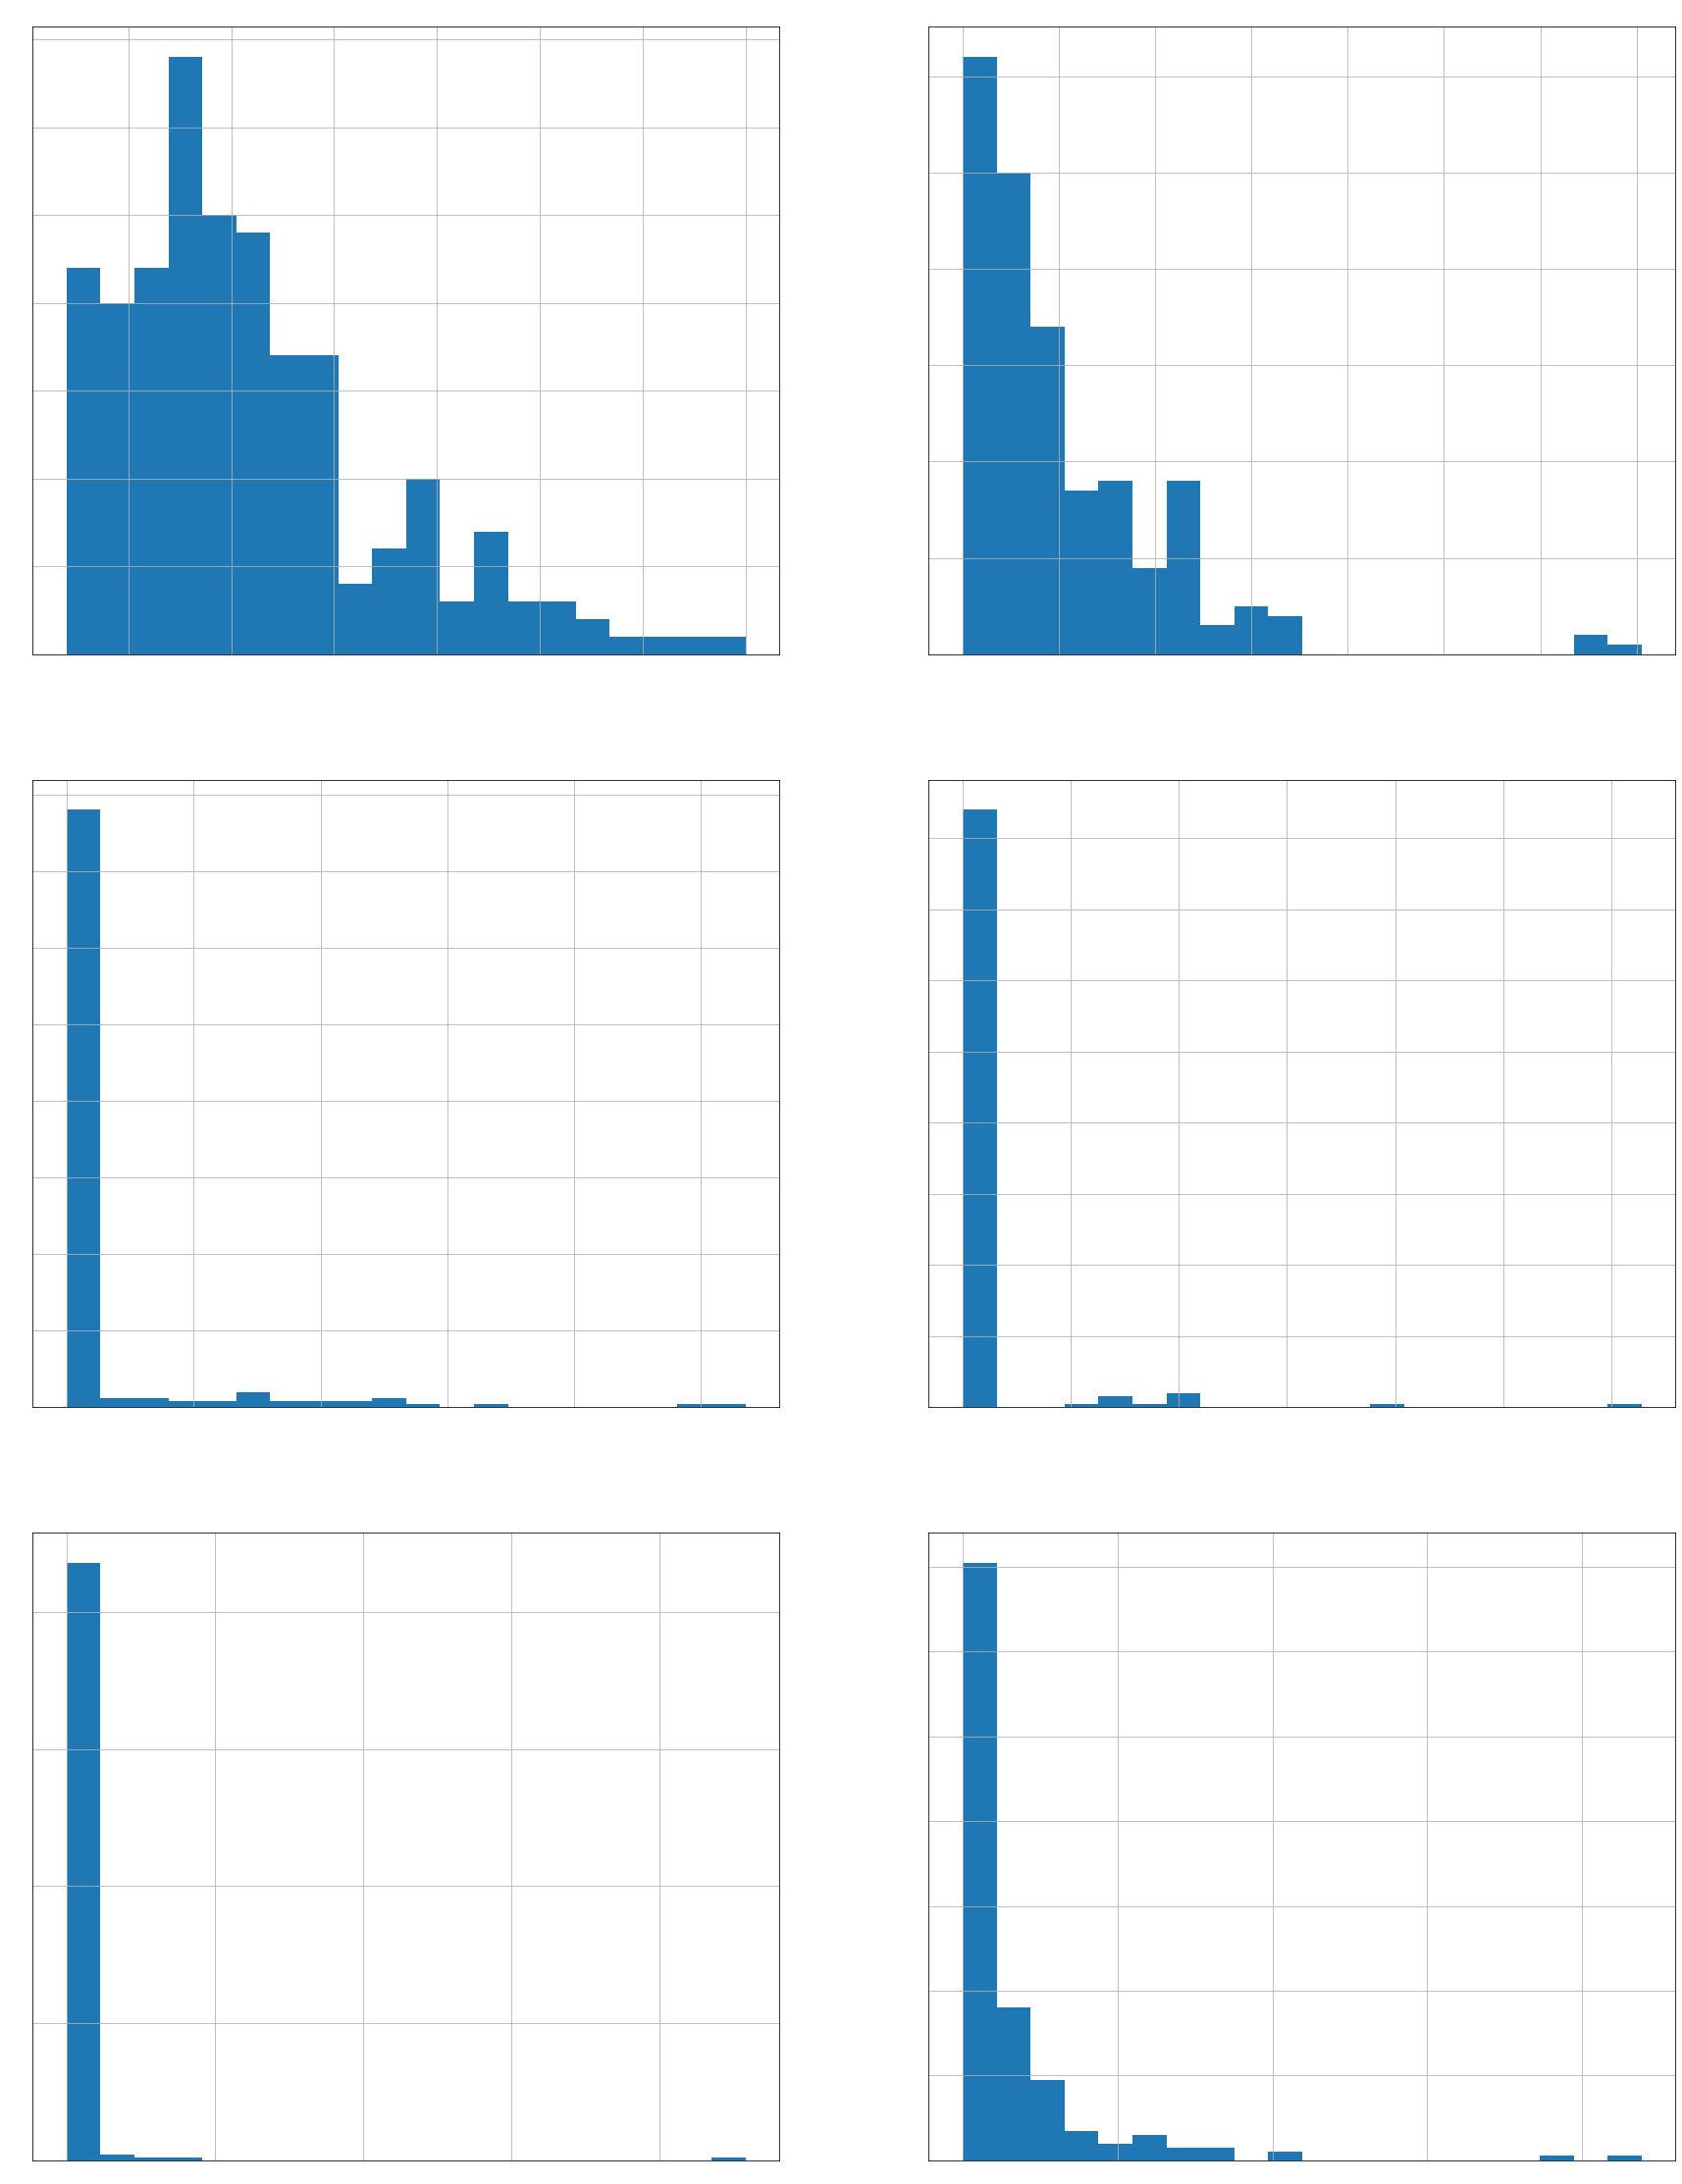

In [13]:
text_columns = ['name', 'description', 'identification', 'damage', 'disorder_development', 'solutions']
fig, axes = plt.subplots(3, 2, figsize = (30, 40))
for i, col in enumerate(text_columns):
    r = i//2
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### TODO
- Create single column out of __name and description__ to be fed by USE (Universal Sentence Encoder)

## Plant items

In [14]:
FILE_NAME = 'plantFlowerItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 186 non-null    object
 1   url                  186 non-null    object
 2   identification       186 non-null    object
 3   optimum_conditions   186 non-null    object
 4   pests_and_disorders  186 non-null    object
 5   images               186 non-null    object
dtypes: object(6)
memory usage: 8.8+ KB


In [15]:
df.sample(5)

,name,url,identification,optimum_conditions,pests_and_disorders,images
18,"California bay, California bay laurel, Oregon ...",http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/bay.htm...,Plant identification The California bay is a n...,California bay grows best in full sun to part ...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca...",[{'link': 'http://ipm.ucanr.edu/PMG/L/S-WO-LAU...
106,"Ficus, Fig, Indian laurel, Laurel fig",http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/ficus.h...,Ficus,The growth requirements for,"[{'problem': 'Armored scales', 'link': 'http:/...",[{'link': 'http://ipm.ucanr.edu/PMG/PESTNOTES/...
72,"Myoporum, lollipop tree",http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/myoporu...,Myoporums are tough and fast-growing evergreen...,"Myoporums are often planted as hedges, screens...","[{'problem': 'Sharpshooters', 'link': 'http://...",[{'link': 'http://ipm.ucanr.edu/PMG/M/S-WO-MYO...
13,Xylosma,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/xylosma...,"Xylosmas are often slow-growing, evergreen or ...",Xylosmas can be grown as hedges or tree. Some ...,"[{'problem': 'Glassy-winged sharpshooter', 'li...",[{'link': 'http://ipm.ucanr.edu/PMG/F/S-WO-FLA...
38,Willow,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/willow....,Plant identification Willows are deciduous tre...,Willows do best in full sun with ample water. ...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca...",[{'link': 'http://ipm.ucanr.edu/PMG/V/S-WO-VEG...


### TODO
- Create separate field with __problems__ keywords
- 

## ETL for UC IPM data

In [1]:
import config

INFO:config:----------------------------------------------
INFO:config:Elasticsearch configuration:
INFO:config:- host                     = http://localhost:9200/
INFO:config:- tfhub_embedding_url      = https://tfhub.dev/google/universal-sentence-encoder/4
INFO:config:- tfhub_cache_dir          = /var/tmp/tfhub_modules
INFO:config:----------------------------------------------
INFO:config:----------------------------------------------
INFO:config:Elasticsearch indexes:
INFO:config:- askextension index       = askextension
INFO:config:- combined index           = combined
INFO:config:----------------------------------------------
INFO:config:Initializing the Elasticsearch client
INFO:config:Done initiliazing ElasticSearch client
INFO:config:Start loading embedding module https://tfhub.dev/google/universal-sentence-encoder/4
INFO:absl:Using /var/tmp/tfhub_modules to cache modules.
INFO:config:Done loading embedding module https://tfhub.dev/google/universal-sentence-encoder/4


In [4]:
list(config.embed(['Daunre is the best of the best']).numpy())

[array([-4.03066278e-02, -8.55801627e-02, -5.19633014e-03, -1.60181206e-02,
         1.86269879e-02,  2.44974717e-02, -1.19241253e-02, -5.55399656e-02,
        -2.74767168e-02,  3.93122472e-02,  2.96255760e-03, -1.15782050e-02,
        -3.49824205e-02,  6.35505766e-02, -1.67545881e-02,  5.36594428e-02,
        -6.23339117e-02, -1.45989768e-02, -1.92423828e-03, -5.81716513e-03,
         1.14903674e-02, -3.37125408e-03, -3.53116379e-03,  5.83902933e-03,
        -5.07235862e-02,  5.38584543e-03, -3.26596946e-02, -1.06383432e-02,
         4.38150130e-02, -4.68116812e-02, -4.09219861e-02,  4.34701107e-02,
        -2.71385368e-02,  1.61566567e-02,  1.28693590e-02,  4.11309153e-02,
        -3.38952169e-02, -1.68552399e-02, -3.92222404e-02,  4.44869362e-02,
        -5.19551523e-02, -8.84679481e-02,  2.79613142e-03,  7.70836547e-02,
         8.54952203e-04,  9.00714938e-03, -4.13292609e-02,  5.15961200e-02,
         2.74377670e-02,  7.69971311e-02, -3.82727310e-02, -9.01606828e-02,
        -1.9

In [18]:
# for some reason he uses these files for injecting

DATA_FILE_NAMES = [
    # "askextension_transformed.json",
    "pestDiseaseItems_new.json",
    "turfPests.json",
    "weedItems.json",
    "exoticPests.json",
    "ipmdata_new.json",
]
DATA_FILE_NAMES = [config.PATH_DATA_UCIPM + f for f in DATA_FILE_NAMES]
DATA_FILE_NAMES.append(config.ASKEXTENSION_FILE_RESULT)

In [36]:
rename_data = {
    'ipmdata_new.json': {
        "name"                  : "name",
        "urlPestNote"           : "urlPestNote",
        "descriptionPestNote"   : "descriptionPestNote",
        "life_cycle"            : "life_cyclePestNote",
        "damagePestNote"        : "damagePestNote",
        "managementPestNote"    : "managementPestNote",
        "imagePestNote"         : "imagePestNote",
        "urlQuickTip"           : "urlQuickTipPestNote",
        "contentQuickTips"      : "contentQuickTipsPestNote",
        "imageQuickTips"        : "imageQuickTipsPestNote",
        "video"                 : "videoPestNote"
    },
    'pestDiseaseItems_new.json': {
        "name"              : "name",
        "url"               : "urlPestDiseaseItems",
        "description"       : "descriptionPestDiseaseItems",
        "identification"    : "identificationPestDiseaseItems",
        "life_cycle"        : "life_cyclePestDiseaseItems",
        "damage"            : "damagePestDiseaseItems",
        "solutions"         : "solutionsPestDiseaseItems",
        "images"            : "imagesPestDiseaseItems",
    },
    'turfPests.json': {
        "name"  : "name",
        "url"   : "urlTurfPests",
        "text"  : "textTurfPests",
        "images": "imagesTurfPests",
    },
    'weedItems.json': {
        "name"          : "name",
        "url"           : "urlWeedItems",
        "description"   : "descriptionWeedItems",
        "images"        : "imagesWeedItems",
    },
    'exoticPests.json': {
        "name"          : "name",
        "url"           : "urlExoticPests",
        "description"   : "descriptionExoticPests",
        "damage"        : "damageExoticPests",
        "identification": "identificationExoticPests",
        "life_cycle"    : "life_cycleExoticPests",
        "monitoring"    : "monitoringExoticPests",
        "management"    : "managementExoticPests",
        "related_links" : "related_linksExoticPests",
        "images"        : "imagesExoticPests", 
    },
    'askextension_transformed.json': {
        "faq-id"        : "ask_faq_id",
        "ticket-no"     : "ask_ticket_no",
        "url"           : "ask_url",
        "title"         : "ask_title",
        "title-question": "ask_title_question",
        "created"       : "ask_created",
        "updated"       : "ask_updated",
        "state"         : "ask_state",
        "county"        : "ask_county",
        "question"      : "ask_question",
        "answer"        : "ask_answer",
    }
}

In [37]:
df_docs_json = {}

for f in DATA_FILE_NAMES:
    # print(f)
    df = pd.read_json(f)
    # print(df.columns)

    if 'name' in df.columns:
        # for some reason he drops the duplicates from these files
        b_s = df.shape[0]
        df = df.drop_duplicates('name')
        a_s = df.shape[0]
        dropped = b_s - a_s
        if dropped > 0:
            print(f"Dropped {dropped} with same 'name' from {f}")
    
    # we then rename the columns to signal where that columns is from
    f_name = f.split('/')[-1]
    
    if f_name in rename_data:
        df = df.rename(columns = rename_data[f_name])
        df = df[rename_data[f_name].values()]
    df_docs_json[f] = df

# we then concatenate all the data
df_docs = pd.concat([df_docs_json[k] for k in df_docs_json.keys()], ignore_index=True)

# we rename the index by 'doc_id'
df_docs.index = df_docs.index.set_names('doc_id')
df_docs.index = df_docs.index.map(str)
df_docs = df_docs.reset_index()
df_docs['ask_faq_id'] = df_docs['ask_faq_id'].map(str)
df_docs['ask_ticket_no'] = df_docs['ask_ticket_no'].map(str)
# we then replace nans and fill nested fields
df_docs = df_docs.fillna('')

columnsNested = ['imagePestNote', 'imageQuickTipsPestNote', 'videoPestNote', 
    'imagesPestDiseaseItems', 'imagesTurfPests', 'imagesWeedItems', 
    'related_linksExoticPests', 'imagesExoticPests', 'ask_answer']

for c in columnsNested:
    df_docs[c] = [[] if x == '' else x for x in df_docs[c]]



Dropped 39 with same 'name' from /home/biddy/Toptal/Eduworks/askchatbot/es/data/uc-ipm/updated/pestDiseaseItems_new.json
Dropped 1 with same 'name' from /home/biddy/Toptal/Eduworks/askchatbot/es/data/uc-ipm/updated/ipmdata_new.json


In [38]:
from elasticsearch.helpers import parallel_bulk

from collections import deque



df_json = df_docs.to_dict('records')
config.es_client.indices.delete(index = config.ES_COMBINED_INDEX, ignore = 404)
config.es_client.indices.create(index = config.ES_COMBINED_INDEX, body=config.ES_COMBINED_MAPPING)        
deque(parallel_bulk(config.es_client, df_json, index = config.ES_COMBINED_INDEX), maxlen = 0)

INFO:elasticsearch:DELETE http://localhost:9200/test [status:200 request:0.021s]
INFO:elasticsearch:POST http://localhost:9200/test/_bulk [status:200 request:0.121s]
INFO:elasticsearch:POST http://localhost:9200/test/_bulk [status:200 request:0.155s]
INFO:elasticsearch:POST http://localhost:9200/test/_bulk [status:200 request:0.291s]
INFO:elasticsearch:POST http://localhost:9200/test/_bulk [status:200 request:0.110s]
INFO:elasticsearch:POST http://localhost:9200/test/_bulk [status:200 request:0.106s]
INFO:elasticsearch:POST http://localhost:9200/test/_bulk [status:200 request:0.024s]
INFO:elasticsearch:POST http://localhost:9200/test/_bulk [status:200 request:0.528s]


deque([])

In [5]:
import es_connection

In [8]:
import pandas as pd

l = [
    'Mary had a little lamb' , 
           'Jack went up the hill' , 
           'Jill followed suit' ,    
           'i woke up suddenly' ,
           'it was a really bad dream...'
]

l = pd.Series(l)

In [9]:
es_connection._get_embed(l)

[array([-0.07028898,  0.01063362,  0.0842308 , -0.03288405,  0.02751029,
         0.00915749,  0.02400744, -0.02631333,  0.03471237,  0.06502552,
         0.01689525, -0.02109356, -0.00321858,  0.01278317, -0.02940628,
        -0.06911615, -0.04477772, -0.02487274,  0.03211745, -0.08086145,
        -0.00277108, -0.01006558, -0.07211316, -0.06477788, -0.06929576,
        -0.07281608,  0.01754246,  0.0170121 ,  0.02811378,  0.01545725,
         0.03691297, -0.07984969, -0.05297564, -0.00378335,  0.03172979,
        -0.07539362,  0.00079097,  0.00419128,  0.03813703, -0.00020649,
         0.07057286, -0.02754744, -0.01972435, -0.03488364, -0.07449262,
         0.02783066, -0.02334888,  0.00195858, -0.07191867, -0.02619875,
         0.01455918, -0.05444118, -0.03768128, -0.04132338,  0.06105937,
         0.04082297,  0.02582584, -0.08042672,  0.01142246,  0.00484627,
        -0.07489309, -0.06260758, -0.08480127,  0.04443357,  0.01584654,
        -0.00983277,  0.05371276, -0.04791364,  0.0